In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

<h1 style="color:blue;">ASK</h1>

<div style="background-color:#fcffc2; padding: 20px;">
    <h2>Context:</h2>
    Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused sma products.
Sršen used her background as an aist to develop beautifully designed technology that informs and inspires women around
the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women; By 2016, Bellabeat had opened oces around the world and launched multiple products. Bellabeat products became available
through a growing number of online retailers in addition to their own e-commerce channel on their website.  The company has invested in traditional adveising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more oppounities for growth. She has
asked the marketing analytics team to focus on a Bellabeat product and analyze sma device usage data in order to gain
insight into how people are already using their sma devices. Then, using this information, she would like high-level
recommendations for how these trends can inform Bellabeat marketing strategy.
    
<h2>Business task:</h2>
Analyzing  smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. 
<h2>Consider key stakeholders </h2>
<ul>
<li><strong>Urška Sršen</strong>: Bellabeat’s cofounder and Chief Creative O</li>
    <li><strong>Sando Mur</strong>: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team</li>
    <li><strong>Bellabeat marketing analytics team</strong>: A team of data analysts responsible for collecting, analyzing, and repoing
data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy
learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help
Bellabeat achieve them</li>
</ul>

<h1 style="color:blue;">PROCESS</h1>

<div style="background-color:#fcffc2; padding: 20px;">
<h2>Localization and organization </h2>
The data source used for our case study is FitBit Fitness Tracker Data. This dataset is stored in Kaggle and was made available through Mobius <br> <br>
We have a collection of  dataset all in csv format. The data is organized in long format. We have dataset like : 
    <ul>
        <li>DailyActivity that determines steps, intensities and calories each day </li>
        <li>Steps  in a hour</li>
        <li>Sleep in a minute, in a day</li>
        <li>WeightLogInfo that contain infomations like BMI, fat for each id </li>
    </ul>
    <h2> Licensing, privacy, security, and accessibility</h2>
    The licence is public domain. The person who associated a work with this deed has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law.
    You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. See Other Information below.

<h2>Credibility of the data. Does the data ROCC? </h2>
    <ol>
        <li>Reliable: <BR>
            The dataset is reliable if it is complete(has all the needed parts) , accurate(correct: it has what is needed ) and unbiased 

=>So from my point view, the size is only for 30 users for 31 days  and don't have  any demographic information so there maybe   bias
  </li> 
        

<li>Currency: <br>
The data is not  current. It was current in 2016.</li>
    </ol>
    <h2>Data's integrity</h2>
    The data's integrity will be verified by performing exploratory data analysis (EDA) in the process steps.
</div>

**Importation of dataset**

<h2>HeartRate</h2>

In [2]:
#Heartrate
heartrate_seconds = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'])
heartrate_seconds['Date'] = heartrate_seconds['Time'].dt.date
heartrate_seconds['Hour'] = heartrate_seconds['Time'].dt.hour
heartrate_seconds['Minute'] = heartrate_seconds['Time'].dt.minute
heartrate_seconds['Secondes'] = heartrate_seconds['Time'].dt.second

minute_heartrate = pd.pivot_table(values='Value', index=['Id','Date', 'Hour', 'Minute'], data=heartrate_seconds, aggfunc='last').reset_index()
minute_heartrate['Date'] = pd.to_datetime(minute_heartrate['Date'])

hourly_heartrate = pd.pivot_table(values='Value', index=['Id','Date', 'Hour'], data=heartrate_seconds, aggfunc='mean').reset_index()
hourly_heartrate['Date'] = pd.to_datetime(hourly_heartrate['Date'])

daily_heartrate = pd.pivot_table(data = hourly_heartrate, values='Value', index=['Id','Date']).reset_index()
daily_heartrate.columns = ['Id', 'Date', 'Daily_heartrate']

print(heartrate_seconds.head(1))

           Id                Time  Value        Date  Hour  Minute  Secondes
0  2022484408 2016-04-12 07:21:00     97  2016-04-12     7      21         0


<h2>Calories</h2>

In [4]:
#HourlyCalories
hourlyCalories = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourlyCalories['ActivityHour'] = pd.to_datetime(hourlyCalories['ActivityHour'])

#MinuteCaloriesNarrow
minuteCaloriesNarrow = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')

#MinuteCaloriesWide
minuteCaloriesWide = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv')

#print('Minute Calories Narrow: \n', minuteCaloriesNarrow.head(2))

<ipython-input-4-01a2f0d1b57a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourlyCalories['ActivityHour'] = pd.to_datetime(hourlyCalories['ActivityHour'])


<h2>Intensities</h2>

In [5]:
#DailyIntensities
dailyIntensities = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')

#HourlyIntensities
hourlyIntensities = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourlyIntensities['ActivityHour'] = pd.to_datetime(hourlyIntensities['ActivityHour'])
hourlyIntensities['Date'] = hourlyIntensities['ActivityHour'].dt.date
hourlyIntensities['Hour'] = hourlyIntensities['ActivityHour'].dt.hour
hourlyIntensities['Date'] = pd.to_datetime(hourlyIntensities['Date'])
#pd.pivot_table(data = hourlyIntensities, values='TotalIntensity', index=['Id','Date'], aggfunc='sum')


#MinuteIntensitiesNarrow
minuteIntensitiesNarrow = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv')
minuteIntensitiesNarrow['ActivityMinute'] = pd.to_datetime(minuteIntensitiesNarrow['ActivityMinute'])
minuteIntensitiesNarrow['Date'] = minuteIntensitiesNarrow['ActivityMinute'].dt.date
minuteIntensitiesNarrow['Date'] = pd.to_datetime(minuteIntensitiesNarrow['Date'])
minuteIntensitiesNarrow['Hour'] = minuteIntensitiesNarrow['Date'].dt.hour
minuteIntensitiesNarrow['Minute'] = minuteIntensitiesNarrow['Date'].dt.minute
minuteIntensitiesNarrow['Time'] = minuteIntensitiesNarrow['ActivityMinute'].dt.strftime("%H:%M:%S") 
#pd.pivot_table(data = minuteIntensitiesNarrow, values='Intensity', index=['Id','Date'], aggfunc='sum')

#MinuteIntensitiesWide
minuteIntensitiesWide = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv')

#Get intensity from hourlyIntensities
dailyIntensities2 = pd.pivot_table(data = hourlyIntensities, values='TotalIntensity', index=['Id', 'Date'], aggfunc='sum').reset_index()

<ipython-input-5-fdddaae54c64>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourlyIntensities['ActivityHour'] = pd.to_datetime(hourlyIntensities['ActivityHour'])
<ipython-input-5-fdddaae54c64>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minuteIntensitiesNarrow['ActivityMinute'] = pd.to_datetime(minuteIntensitiesNarrow['ActivityMinute'])


<h2>DailyActivity</h2>


In [3]:
#DailyActivity
dailyActivity = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
#Convert ActivityDate column to date datatype
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'])
dailyActivity['Month'] = dailyActivity['ActivityDate'].dt.month
dailyActivity['Weekday'] = dailyActivity['ActivityDate'].dt.weekday
dailyActivity['WeekofYear'] = dailyActivity['ActivityDate'].dt.isocalendar().week

#Merge strength_intensities with dailyActivity
#dailyActivity = dailyIntensities2.merge(dailyActivity, left_on=['Id', 'Date'], right_on=['Id', 'ActivityDate'])

#Merge daily_heartrate with dailyActivity
#dailyActivity = dailyActivity.merge(daily_heartrate, left_on=['Id','ActivityDate'], right_on=['Id', 'Date'])

#Merge dailyActivity and sleepDay
#dailyActivity = dailyActivity.merge(sleepDay, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

<h2>Steps</h2>

In [4]:
#Daily Steps: 
dailySteps = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')

#hourly Steps
hourlySteps = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
hourlySteps['ActivityHour']= pd.to_datetime(hourlySteps['ActivityHour'])
hourlySteps['Date']= hourlySteps['ActivityHour'].dt.date
hourlySteps['Date'] = pd.to_datetime(hourlySteps['Date'])
hourlySteps['Hour'] = hourlySteps['Date'].dt.hour

#MinuteStepsNarrow
minuteStepsNarrow = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv')
minuteStepsNarrow['ActivityMinute'] = pd.to_datetime(minuteStepsNarrow['ActivityMinute'])
minuteStepsNarrow['Date'] = minuteStepsNarrow['ActivityMinute'].dt.date

#MinuteStepsWide
minuteStepsWide = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv')

hourlySteps.head(2)

<ipython-input-4-628e86a91bad>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourlySteps['ActivityHour']= pd.to_datetime(hourlySteps['ActivityHour'])
<ipython-input-4-628e86a91bad>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minuteStepsNarrow['ActivityMinute'] = pd.to_datetime(minuteStepsNarrow['ActivityMinute'])


,Id,ActivityHour,StepTotal,Date,Hour
0,1503960366,2016-04-12 00:00:00,373,2016-04-12,0
1,1503960366,2016-04-12 01:00:00,160,2016-04-12,0


<h2>Sleep</h2>

In [5]:
#MinuteSleep
minuteSleep= pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')
minuteSleep['date'] = pd.to_datetime(minuteSleep['date'])
minuteSleep['Jour'] = minuteSleep['date'].dt.date

#pd.pivot_table(data = minuteSleep, values='value', index=['Id','Jour'], aggfunc='sum')
sleepDay = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])
sleepDay['Difference'] = sleepDay['TotalTimeInBed'] - sleepDay['TotalMinutesAsleep']

#print(pd.pivot_table(data = minuteSleep, values='value', index=['Id','Jour'], aggfunc='sum').head())

<ipython-input-5-1db10398fe9a>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])


**MinuteSleep by day don't give the same result as Sleepday, and  MinuteSleep_by_day>intensities_activities_day>sleep_day=1440**

<h2>Minute MET</h2>

In [7]:
minuteMet = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')
minuteMet['ActivityMinute'] = pd.to_datetime(minuteMet['ActivityMinute'])
minuteMet['Date'] = minuteMet['ActivityMinute'].dt.date
minuteMet['Time'] = minuteMet['ActivityMinute'].dt.strftime("%H:%M:%S")
minuteMet['Hour'] = minuteMet['ActivityMinute'].dt.hour
minuteMet['Minute'] = minuteMet['ActivityMinute'].dt.minute

<ipython-input-7-845ada45adf3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minuteMet['ActivityMinute'] = pd.to_datetime(minuteMet['ActivityMinute'])


<h2>WeightLogInfo</h2>

In [6]:
weightLogInfo = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
weightLogInfo['Date'] = pd.to_datetime(weightLogInfo['Date'])
weightLogInfo['Day'] = weightLogInfo['Date'].dt.date
weightLogInfo['Day'] = pd.to_datetime(weightLogInfo['Day'])

<ipython-input-6-d8987639a340>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weightLogInfo['Date'] = pd.to_datetime(weightLogInfo['Date'])


<h1 style="color:blue;">PREPARE</h1>

The dataset we are going to prepare  are dailyActivity, sleepDay and weightLogInfo. We don't check the others dataset because a lot of  informations are already contained in the dailyActivity dataset.

<h3>Checking missing values</h3>

Text(0.5, 1.0, 'WeightLogInfo')

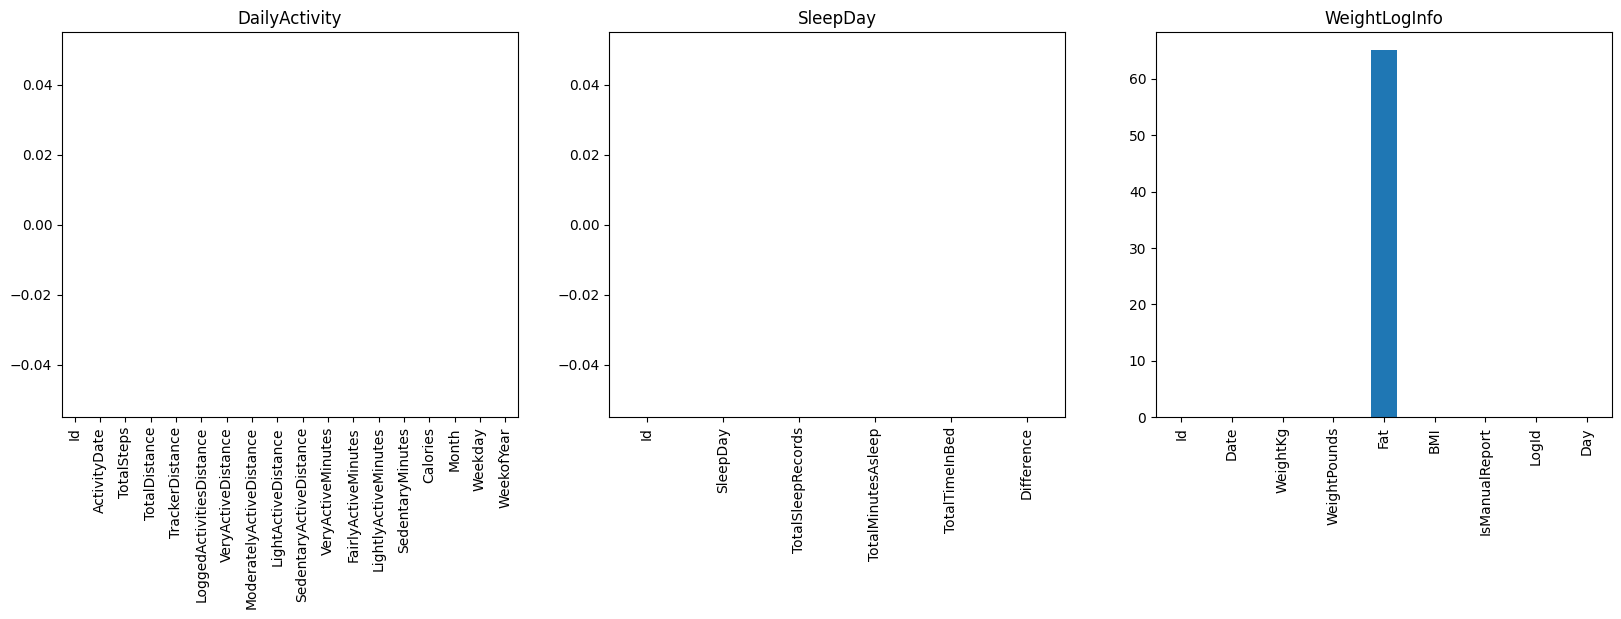

In [23]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
dailyActivity.isnull().sum().plot(kind='bar', ax = ax[0])
ax[0].set_title('DailyActivity')
sleepDay.isnull().sum().plot(kind='bar', ax = ax[1])
ax[1].set_title('SleepDay')
weightLogInfo.isnull().sum().plot(kind='bar', ax = ax[2])
ax[2].set_title('WeightLogInfo')

**As we see, only the colums 'fat' in the weightLogInfo contain missing rows**

<h3>Checking data type</h3>

In [12]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [24]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   Difference          413 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 19.5 KB


In [25]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
 8   Day             67 non-null     datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(4), int64(2)
memory usage: 4.4 KB


<h1 style="color:blue;">ANALYZE AND SHARE</h1>

<div style="background-color:#fcffc2; padding: 20px;">
    <div>
    The gadget track  health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits so here are things we will analyze :
    <ul> 
        <li>Category of  the people using the gadget</li>
        <li>Day and time  people make their  activity</li>
        <li> Sleep which should be between 7 to 8 hours </li>
        <li>Steps</li>
        <li>Calories  </li>
        <li>BMI</li> 
    </ul>
        We could analyze heartrate but more informations like genre and age would be really useful for it.
</div>
</div>

<h2>Categorizing the people using  the gadget</h2>

Using the dataset dailyActivity, we are going to see how users differ  in sleep and steps. That means we are going to merge the datastes dailyActivity and sleepDay

In [17]:
dailyActivity_Sleep = dailyActivity.merge(sleepDay, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

In [18]:
def categorize(x):
    if x<=10:
        return 'less_than_10days'
    elif 11<=x<=20:
        return 'between_10to20days'
    elif x>20:
        return 'more_than_20days'

In [19]:
#Create a subset of  dataset that contain unique rows for id, activitydate, totalsteps, totalminutesasleep
id_activityDate = dailyActivity_Sleep[['Id', 'ActivityDate', 'TotalSteps', 'TotalMinutesAsleep']].drop_duplicates()
#A series  that contain for how many days  id was active 
id_nbrdaysusing= pd.Series(id_activityDate['Id'].value_counts())
#Creating column in the subset of  data to know how many days the id was online  
id_activityDate['Utilization'] = id_activityDate['Id'].map(lambda x: id_nbrdaysusing[x])
id_activityDate['Category'] = id_activityDate['Utilization'].map(categorize)

<Axes: xlabel='Category', ylabel='TotalMinutesAsleep'>

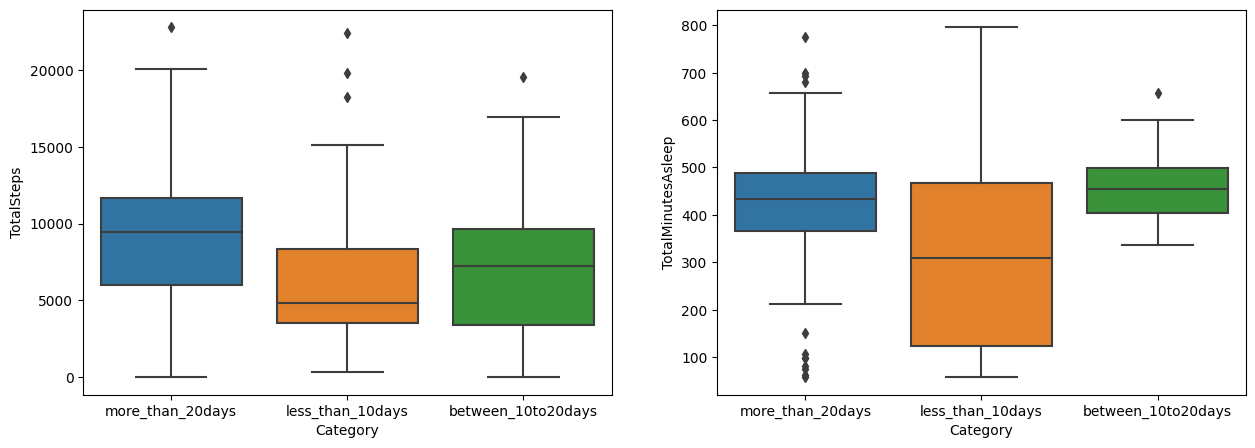

In [20]:
#pd.pivot_table(data=id_activityDate,  index='Category', values=['TotalSteps', 'TotalMinutesAsleep'], aggfunc={'TotalSteps': ['mean','count'], 'TotalMinutesAsleep':'mean'})
#sns.boxplot(id_activityDate[id_activityDate['Category']=='between_10to20days'][['TotalSteps']])
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=id_activityDate, x="Category", y="TotalSteps", ax=axs[0])
sns.boxplot(data=id_activityDate, x="Category", y='TotalMinutesAsleep', ax=axs[1])

<div style="background-color:#fcffc2; padding: 20px;">
        From the two plots here, we see that the less_than_10_days category have the lowest TotalSteps and TotalMinutesAsleep. Maybe the app and gadget wasn't really helping  them that's why they use the gadget for such few days. So strategy like encouragement  would be really useful for them.<br> 
    
</div>

<h2>Time of activities</h2>

**What is the preferred time for people to practice activity?**

<BarContainer object of 22099 artists>

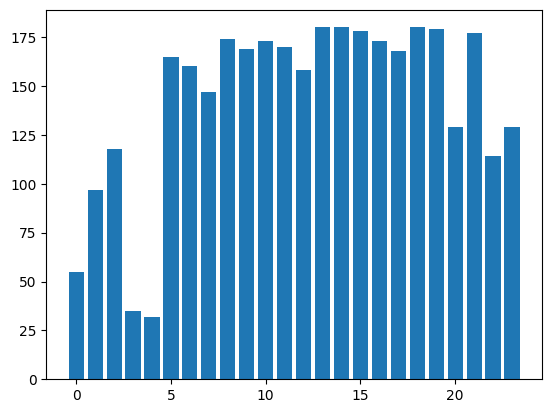

In [21]:
plt.bar(hourlyIntensities['Hour'], hourlyIntensities['TotalIntensity'])

**From this bar plot, we see that people do their activites from 5 AM to 7PM**

<h2>Day of activities</h2>

In [22]:
hourlyIntensities['weekday'] = hourlyIntensities['Date'].dt.weekday

<Axes: xlabel='weekday'>

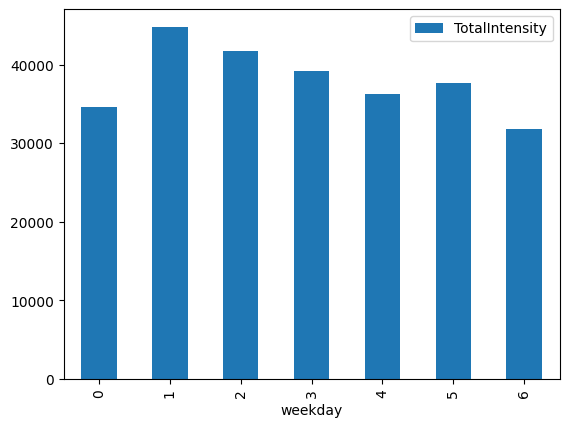

In [23]:
pd.pivot_table(data=hourlyIntensities, index=['weekday'], values='TotalIntensity', aggfunc='sum').plot(kind='bar')

**People practice their activity mostly on Tuesday**

<h2>CALORIES</h2>

**Let's make a heatmap of correlation** 

<Axes: >

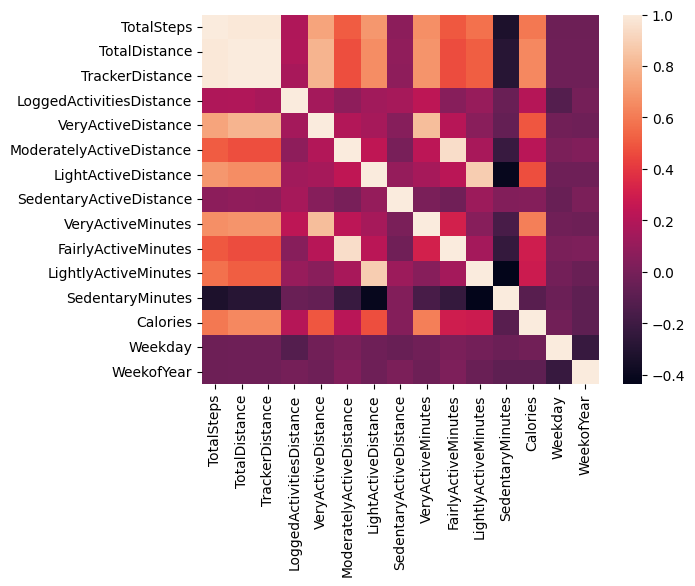

In [24]:
sns.heatmap(dailyActivity.drop(columns=['Month','Id']).corr(numeric_only=True))

<div style="background-color:#fcffc2; padding: 20px;">As we see there are strong correlation between calories and totalSteps, totalDistance and very active minutes</br>

What can we say from these  correlation?
- Steps, totalDistance, veryActiveMinutes  and Calories are related so the more steps and distances we make, the more calories we burn
- Sedentary minutes and sedentarydistance  don't act in burning these calories which is logic.
</div>

<h2>Steps</h2>

Steps contain 4 categories: 
- Sedentary: <5000 steps 
- Lightly active: 5000 to 7499 steps 
-  Fairly active: 7500 to  10000 steps 
-   Very active:  >= 10000 steps 
  
Lets see how people are organized in these categories

In [26]:
def categorize_steps(x):
    if x<5000:
        return 'Sedentary'
    elif 5000<=x<=7499:
        return 'Lightly_active'
    elif 7500<=x<=9999:
        return 'Fairly_active'
    elif x>=10000:
        return 'Very_active'

dailyActivity['Steps_category']=dailyActivity['TotalSteps'].map(categorize_steps)

#Count each category
sedentary = dailyActivity[dailyActivity['Steps_category']=='Sedentary'].shape[0]/dailyActivity.shape[0]
lightly_active = dailyActivity[dailyActivity['Steps_category']=='Lightly_active'].shape[0]/dailyActivity.shape[0]
fairly_active = dailyActivity[dailyActivity['Steps_category']=='Fairly_active'].shape[0]/dailyActivity.shape[0]
very_active = dailyActivity[dailyActivity['Steps_category']=='Very_active'].shape[0]/dailyActivity.shape[0]

([<matplotlib.patches.Wedge at 0x7cdf15dc5de0>,
 [Text(0.5878607719979244, 0.941551757868894, 'Sedentary'),
  Text(-0.9493262042074834, 0.5752214860425608, 'Ligthly_active'),
  Text(-0.9336090149078284, -0.6003950426867583, 'Fairly_active'),
  Text(0.5878608601523595, -0.9415517028293924, 'Very_active')],
 [Text(0.3230586224493098, 0.5174293444144372, '32.2340%'),
  Text(-0.5217017878978061, 0.3161127085459118, '18.1915%'),
  Text(-0.5130644135979957, -0.32994682526029057, '17.3404%'),
  Text(0.3230586708945399, -0.5174293141675038, '32.2340%')])

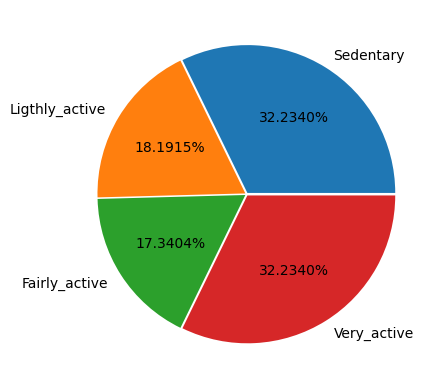

In [27]:
plt.pie([sedentary, lightly_active, fairly_active, very_active], labels=['Sedentary', 'Ligthly_active', 'Fairly_active', 'Very_active'], autopct='%1.4f%%',explode=[0.01,0.01,0.01,0.01])

<div style="background-color:#fcffc2; padding: 20px;" >We see that 32.23% of people are very active, these respect the more than 10000 steps people should do each day and the rest 67.766% make lower than that </br>
However it is said that if that daily steps is not respected, 30mn each day can is already a good thing so  lets see how many of these left people respect their  30mn  of moderate activity
</div>

([<matplotlib.patches.Wedge at 0x7cdf144849a0>,
 [Text(0.6887707027089668, 0.8704567301651451, 'More_than_30_mn'),
  Text(-1.1031363436575208, 0.12324855902572097, 'Less_than_30_mn'),
  Text(0.5878607719979244, -0.941551757868894, 'Very active')],
 [Text(0.3785136294166394, 0.4783591039646293, '28.6924%'),
  Text(-0.6062280807487275, 0.06773119009521603, '39.0736%'),
  Text(0.3230586224493098, -0.5174293444144372, '32.2340%')])

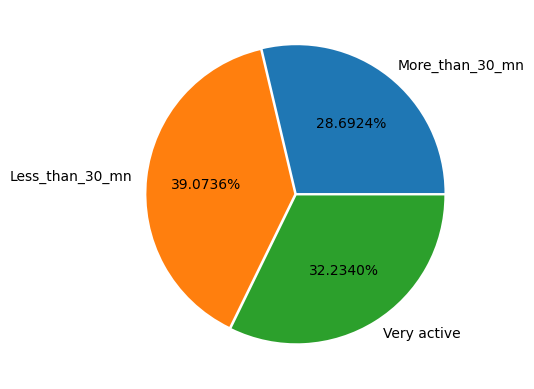

In [29]:
#We are going create a new column VeryFairlyActive minutes that combine the very active minutes and fairly active minutes 
dailyActivity['VeryFairlyActiveMinutes'] = dailyActivity['VeryActiveMinutes'] + dailyActivity['FairlyActiveMinutes']

more_than_30_mn = dailyActivity[dailyActivity['VeryFairlyActiveMinutes']>=30].shape[0] /  dailyActivity.shape[0]
less_than_30_mn = dailyActivity[dailyActivity['VeryFairlyActiveMinutes']<30].shape[0]  /  dailyActivity.shape[0]

more_than_30_mn = more_than_30_mn*(1-very_active)
less_than_30_mn = less_than_30_mn*(1-very_active)
plt.pie([more_than_30_mn, less_than_30_mn, very_active], labels=['More_than_30_mn', 'Less_than_30_mn', 'Very active'], autopct='%1.4f%%',explode=[0.01, 0.01, 0.01])
#Show the 3 plots

<div style="background-color:#fcffc2; padding: 20px;">Here we see about 40% of people achieve neither the 10000 daily steps, nor  the more than 30mn of moderate activity.</div>

<h2>Sleep</h2>

([<matplotlib.patches.Wedge at 0x7cdf144b3d60>,
 [Text(0.5431500932951103, 0.9680330449698054, 'Lower_than7'),
  Text(-0.7073831036752831, -0.8553999910186603, 'Between_7to9'),
  Text(1.0921357035707238, -0.19834214122591487, 'Greater_than9')],
 [Text(0.29848788910812374, 0.5319821238122353, '33.7243%'),
  Text(-0.3887420659837141, -0.4700846797489934, '60.5572%'),
  Text(0.6001826839442714, -0.10899883436739463, '5.7185%')])

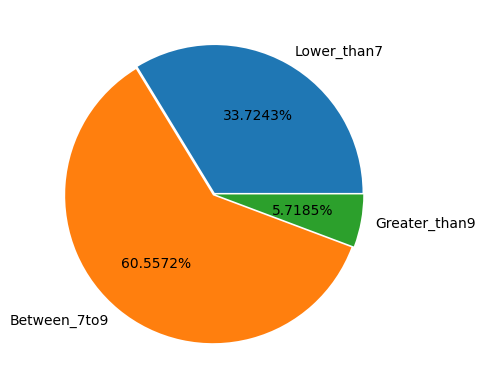

In [30]:
between_7to9 = sleepDay[(420<=sleepDay['TotalMinutesAsleep']) | (sleepDay['TotalMinutesAsleep']<=540)].shape[0] / sleepDay.shape[0]
lower_than_7 =  sleepDay[420<sleepDay['TotalMinutesAsleep']].shape[0] / sleepDay.shape[0]
greater_than_9=  sleepDay[sleepDay['TotalMinutesAsleep']>540].shape[0] / sleepDay.shape[0] 

plt.pie([lower_than_7, between_7to9, greater_than_9] ,labels =['Lower_than7', 'Between_7to9', 'Greater_than9'], autopct='%1.4f%%',explode=[0.01, 0.01, 0.01])

<div style="background-color:#fcffc2; padding: 20px;">33.37% have sleep lower than 7 but we don't know if these people  really have  trouble with sleep or if they choose it during the little amount of time the  data collection was done. Let's say at least , one person should have 6 hours a days so  let's check the totalSteps distribution  for each month of the analysis between sleep less or more than 6 hours<div>

([<matplotlib.axis.XTick at 0x7cdf143a5000>,
 [Text(1, 0, 'Lower_than_5'), Text(2, 0, 'Greater_than_5')])

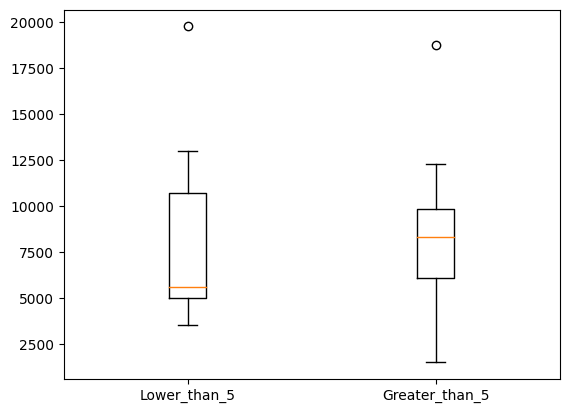

In [37]:
dailyActivity_Sleep['month'] = dailyActivity_Sleep['ActivityDate'].dt.month 
#Calculate Intensities in a weekofYear
WeekofYear_Intensity_SleepDay = pd.pivot_table(data=dailyActivity_Sleep, index = ['Id', 'Month'], values=[ 'TotalMinutesAsleep', 'TotalSteps'], aggfunc={ 'TotalMinutesAsleep': "mean", "TotalSteps": "mean"}).reset_index()
#print(WeekofYear_Intensity_SleepDay)

lower_than_6 =  WeekofYear_Intensity_SleepDay[360>WeekofYear_Intensity_SleepDay['TotalMinutesAsleep']]['TotalSteps']
greater_than_6 = WeekofYear_Intensity_SleepDay[WeekofYear_Intensity_SleepDay['TotalMinutesAsleep']>360]['TotalSteps']

plt.boxplot([lower_than_6, greater_than_6])
plt.xticks(np.arange(1,3), labels=['Lower_than_6', 'Greater_than_6'])

<div style="background-color:#fcffc2; padding: 20px;" >Let's make a t-test to check  the hypothese: People who sleep less than 6  hours a day have lower mean totalsteps  than people who  sleep more than 6  hours </br></br>

<strong>Ho ( Null hypothesis) </strong>:People who sleep less than 6  hours a day have lower mean totalsteps  than people who  sleep more than 6  hours

<strong>Ha ( Alternative hypothesis)</strong>: There is no difference in mean totalsteps between people who sleep less than 6 hours and those who sleep more

<strong>Significance level</strong>: 5%
</div>







In [38]:
ttest_ind(lower_than_5, greater_than_5, equal_var=False)

TtestResult(statistic=0.358635211511003, pvalue=0.7241581585322998, df=17.499633200311855)

<div style="background-color:#fcffc2; padding: 20px;">From the test, leep duration is not related to steps. Maybe this is due  the little amount of time the data is collected so to get better results we could increase the time of the data collection</div>

**BMI**

<div>In this part, we'll check in each BMI category  people are. So we have 5 categories: 
<ul>
<li> <18.5: Underweight</li>
<li>[18.5; 24.9]: Normal </li>
<li>  [25;29.9]: Overweight</li>
 <li> [30;34.9]: Obese</li>
 <li> >35: Extremely obese</li>
</ul>
</div>

In [57]:
def categorize(bmi):
    if bmi<18.5: 
        return 'Underweight'
    elif 18.5<=bmi<=24.9:
        return 'Normal'
    elif 25<=bmi<=29.9:
        return 'Overweight'
    elif 30<=bmi<=34.9:
        return 'Obese'
    else: 
        return 'Extremely obese'

<Axes: xlabel='Category'>

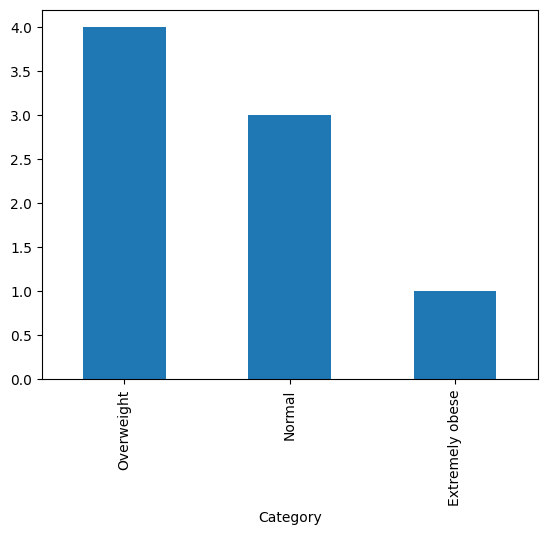

In [60]:
weightLogInfoCategory = weightLogInfo.groupby('Id')['BMI'].mean().reset_index()
weightLogInfoCategory['Category'] = weightLogInfoCategory['BMI'].map(categorize)
weightLogInfoCategory['Category'].value_counts().plot(kind='bar')

<div style="background-color:#fcffc2; padding: 20px;">In this part, the values to analyze are quite small but we see that users  fall in the category  Overweight( 4 people) , normal (3 people) and Extremely Obese(1 people). There are no underweight people, we can say that  these underweight people  aren't really interested in making regular activities however the sample is really small so we wouldn't be sure about that </br></br>


With this small size, let's see how much activities people do according to their category: normal and overweight</br>
<ul>
<li> Normal people  should make 10000 steps or 30 minutes of moderate activity a day as said previously.</li>
    <li>For overweight people or more, men should do 11000 to 12000 steps and women should do 8000 to 12000 steps or at least 45 to 60mn of moderate activity a day</li>
<ul>
    
</div>

In [83]:
weightLogInfoCategory_Steps = weightLogInfoCategory.merge(dailyActivity.groupby('Id')[['TotalSteps', 'VeryFairlyActiveMinutes']].mean().reset_index(), left_on='Id', right_on='Id')
pd.pivot_table(data= weightLogInfoCategory_Steps, index=['Category', 'Id'],values=['BMI', 'TotalSteps','VeryFairlyActiveMinutes'])

BMI    TotalSteps  VeryFairlyActiveMinutes
Category        Id                                                          
Extremely obese 1927972279  47.540001    916.129032                 2.096774
Normal          1503960366  22.650000  12116.741935                57.870968
                2873212765  21.570001   7555.774194                20.225806
                6962181067  24.028000   9794.806452                41.322581
Overweight      4319703577  27.415000   7268.838710                15.903226
                4558609924  27.214000   7685.129032                24.096774
                5577150313  28.000000   8304.433333               117.166667
                8877689391  25.487083  16040.032258                76.000000

<div style="background-color:#fcffc2; padding: 20px;" >
    For people with  normal BMI:
    <ul> 
        <li> 1/3 achieve the 10000 steps </li>
        <li> 1/3 achieve the 30mn of moderate activity </li>
        <li> 1/3 achieve less than the 10000 steps and the 30mn of moderate activity </li>
    </ul>
    For  people with  overweight or extremely obese BMI : 
     <ul> 
        <li> 1/5 achieve more than  the 12000 steps </li>
        <li> 1/5 achieve more than  45mn of moderate activity </li>
        <li> 3/5 achieve less than the 12000 steps and the 45mn of moderate activity </li>
    </ul>

What can we do  then? <br>
For people with normal BMI, there are 1/3 not achieveing the 10000daily steps and 30mn of activity  and for people with overweight BMI, there are 1/2 achieving less than the 12000 steps and the 45 mn of activity so  according to their category, we could help them achieving that daily goals.
</div>

<h1 style="color:blue;">ACT </h1>
<div style="background-color:#fcffc2; padding: 20px;"> 
    Here are some actions to take related to the analysis: 
    <ul>
        <li> <strong>Customizing activity according to category: </strong>We know that people are divided into at least 3  category  according to BMI so  for each BMI, we could give related  recommendations </li> 
        <li><strong>Giving choice to  people on how they would like to  achieve their daily activities </strong> like for normal people:10000 daily steps or 30mn of moderate activity  </li>
        <li><strong>Sending notification </strong> to remember  people on how much of activity they have do and how much  is left </li>
        <li><strong>Giving reward: </strong>to people when they achieve their activities </li>
</br> 
However due to the limited size of data in the analysis, the results of the analysis  may be biased and really incomplete . So more  personal informations like genre, age, weight , height and more data would be really useful for better analysis. 
</div>